In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np

In [3]:
data = json.loads(open("time_diffs4.json").read())
llm_times = pd.Series(data["llm_times"])
tts_times = pd.Series(data["tts_times"])
stt_times = pd.Series(data["stt_times"])
sent_audio_times = pd.Series(data["sent_audio_times"])
recieved_audio_times = pd.Series(data["recieved_audio_times"])
send_times = pd.Series(data["send_times"])
receive_times = pd.Series(data["receive_times"])

In [4]:
tts_times.count(), sent_audio_times.count(), recieved_audio_times.count(), send_times.count(), receive_times.count(), llm_times.count(), stt_times.count()

(47, 47, 44, 42, 44, 47, 44)

In [5]:
data = {
    "LLM Times": llm_times,
    "TTS Times": tts_times,
    "STT Times": stt_times,
    "Sent Audio Times": sent_audio_times,
    "Recieve Audio Times": recieved_audio_times,
    "Send Times": send_times,
    "Receive Times": receive_times,
}

# Cria um DataFrame com os dados
df = pd.DataFrame(data)

In [6]:
df.describe()

,LLM Times,TTS Times,STT Times,Sent Audio Times,Recieve Audio Times,Send Times,Receive Times
count,47.000000,47.000000,44.000000,47.000000,44.000000,42.000000,44.000000
mean,2738.999760,1397.215228,724.090105,4162.042553,8383.151515,1.298326,40.536180
std,3536.500619,1379.847044,475.246771,2671.978118,3265.695652,3.303912,23.337008
min,815.193300,363.393200,381.071500,1430.000000,42.666667,0.000000,0.000000
25%,1379.170000,794.854100,488.750125,3035.333333,10000.000000,0.000000,24.129050
50%,1645.493900,1089.328700,574.000050,3712.666667,10000.000000,0.000000,50.007100
75%,2265.920350,1403.761050,733.250275,4523.333333,10000.000000,1.000150,60.018750
max,19183.885800,8558.099900,3289.897200,19307.333333,10000.000000,15.904500,77.592700


In [7]:
# z_scores = (df - df.mean(skipna=True)) / df.std(skipna=True)

# # Filtra os valores cujo Z-Score absoluto seja menor ou igual a 3
# filtered_df = df[(np.abs(z_scores) <= 3).all(axis=1)]

# # Exibe o DataFrame filtrado
# filtered_df.describe()

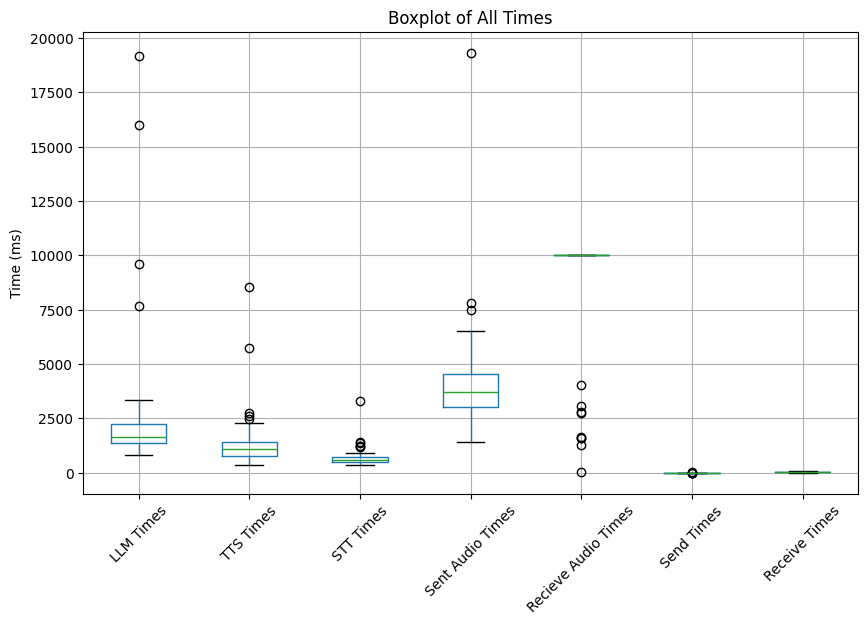

In [8]:
# Gera um único boxplot indexado
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title("Boxplot of All Times")
plt.ylabel("Time (ms)")
plt.xticks(rotation=45)
plt.show()